In [46]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
import numpy as np
import os
import copy
sns.set_context('poster') # other optionss are: 'poster', 'notebook'
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
input_dir = "./sample_data"
file1 = os.path.join(input_dir, "data.csv") 
file2 =  os.path.join(input_dir,  "dataset/data-infos.csv") 

# read orignal data
odf = pd.read_csv(file1, encoding = "ISO-8859-1")

# read info data
idf = pd.read_csv(file2, encoding = "ISO-8859-1", sep = ';')



In [48]:
# explore orignal data
odf

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,B001_01,B001_02,B001_03,B001_04,...,B022x19,B022x20,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
0,Interview-Nummer (fortlaufend),Seriennummer (sofern verwendet),Referenz (sofern im Link angegeben),"Fragebogen, der im Interview verwendet wurde",Interview-Modus,Zeitpunkt zu dem das Interview begonnen hat (E...,0-Frage: 0-0.jpg,0-Frage: 0-1.jpg,0-Frage: 0-2.jpg,0-Frage: 0-3.jpg,...,ZG: Gezogener Code (19),ZG: Gezogener Code (20),Wurde die Befragung abgeschlossen (letzte Seit...,Hat der Teilnehmer den Fragebogen nur angesehe...,"Seite, die der Teilnehmer zuletzt bearbeitet hat","Letzte Seite, die im Fragebogen bearbeitet wurde",Anteil fehlender Antworten in Prozent,Anteil fehlender Antworten (gewichtet nach Rel...,Maluspunkte für schnelles Ausfüllen,Maluspunkte für schnelles Ausfüllen
1,59,NaN,NaN,final,interview,2022-06-23 11:50:35,1,4,2,3,...,18,14,1,0,2,2,0,0,1.26,25
2,68,NaN,NaN,final,interview,2022-06-28 14:03:06,4,1,5,3,...,19,16,1,0,2,2,0,0,0.66,0
3,70,NaN,NaN,final,interview,2022-07-04 14:07:53,3,4,5,1,...,2,13,1,0,2,2,0,0,0.87,8
4,75,NaN,NaN,final,interview,2022-07-04 16:26:49,4,3,5,1,...,10,20,1,0,2,2,0,0,0.42,0
5,76,NaN,NaN,final,interview,2022-07-04 16:34:24,4,1,5,2,...,10,4,1,0,2,2,0,0,0.41,0
6,78,NaN,NaN,final,interview,2022-07-04 17:00:34,2,1,5,3,...,12,4,1,0,2,2,0,0,0.7,8
7,80,NaN,NaN,final,interview,2022-07-04 17:44:38,1,3,5,2,...,20,1,1,0,2,2,0,0,0.79,0
8,86,NaN,NaN,final,interview,2022-07-04 18:10:28,4,1,3,5,...,4,13,1,0,2,2,0,0,2.71,110
9,89,NaN,NaN,final,interview,2022-07-04 19:05:20,4,3,5,2,...,13,11,1,0,2,2,0,0,0.72,6


In [49]:
# explore info data
idf

,ï»¿Picture Series,Picture,Price,Gallery,Category,Link
0,0,0,"0,2",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
1,0,1,"0,17",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
2,0,2,"0,1499",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
3,0,3,"0,129",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
4,0,4,"0,12",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
...,...,...,...,...,...,...
95,19,0,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...
96,19,1,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...
97,19,2,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...
98,19,3,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...


In [50]:
def get_rankings(df, columns, grp):
    rank_list = []


    # collect data
    for c in columns:
        rank_list.append(df[c].values[1:])
    rank_list = (np.vstack(rank_list)).T
    rank_list = rank_list.astype(float)
    # print(rank_list)

    # clean data, remove rows containing NaN
    nan_mask = np.isnan(rank_list).any(axis=1)
    rank_list = rank_list[~nan_mask]
    # print(rank_list)

    ranking_sum = np.sum(rank_list, axis=0)
    ranking_average = np.average(rank_list, axis=0)
    ranking_std = np.std(rank_list, axis=0)

    return {"ranking_sum": ranking_sum,
            "ranking_average":ranking_average,
            "ranking_std":ranking_std}

In [51]:
# df = pd.read_csv(file2, encoding="latin-1")

num_images_per_group = 5
num_of_groups = 20
ranking_sums = []
ranking_avgs = []


for grp in range(num_of_groups):
    if grp+1 <10:
        columns = [f"B00{grp+1}_0{i+1}" for i in range(num_images_per_group)]
    else:
        columns = [f"B0{grp+1}_0{i+1}" for i in range(num_images_per_group)]

    ranking_res = get_rankings(odf, columns, grp+1)
    ranking_sums.append(ranking_res['ranking_sum'])
    ranking_avgs.append(ranking_res['ranking_average'])
# print(ranking_sums)
ranking_sums = np.hstack(np.array(ranking_sums))
ranking_avgs = np.hstack(np.array(ranking_avgs))
# print(ranking_sums)

In [52]:
price_in_str = idf['Price'].values
prices = [float(p.replace(',', '.')) for p in price_in_str]
gallery_names = idf['Gallery'].values

In [53]:
def min_max_norm(input_xs):
    xs = copy.deepcopy(input_xs)
    x_max, x_min = np.max(xs), np.min(xs)
    if x_max != x_min:
        xs = (xs-x_min)/(x_max-x_min)
    else:
        xs = xs/x_max
    return xs


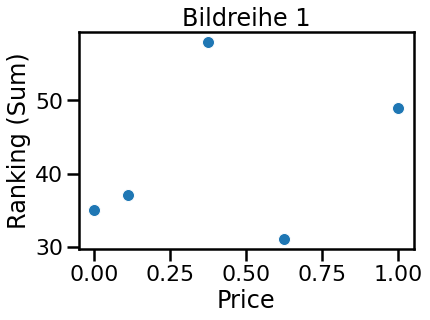

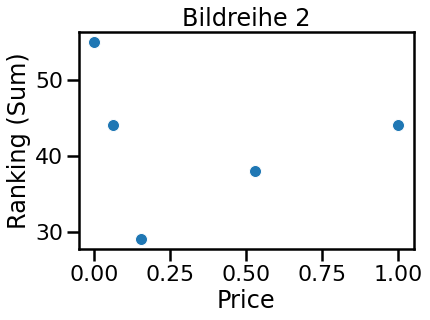

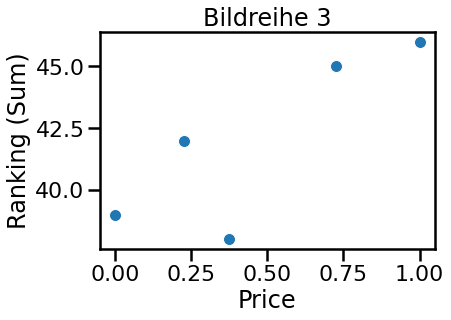

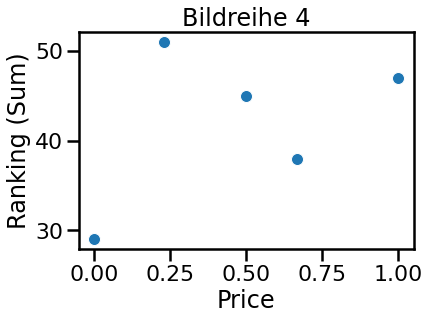

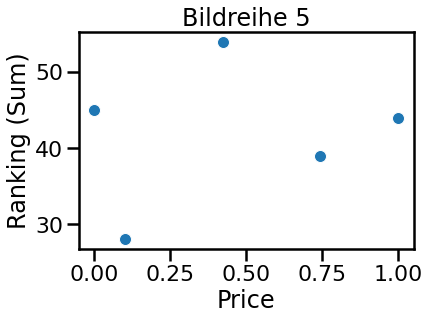

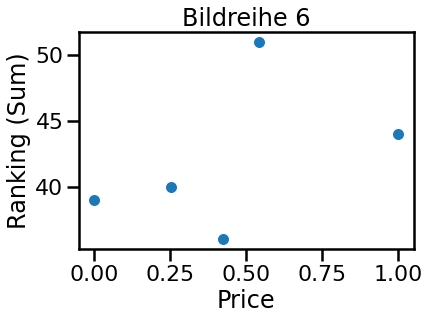

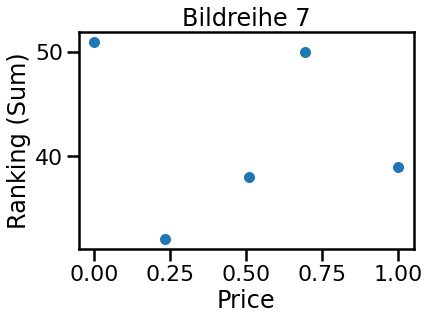

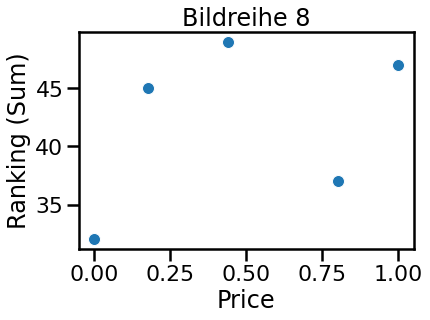

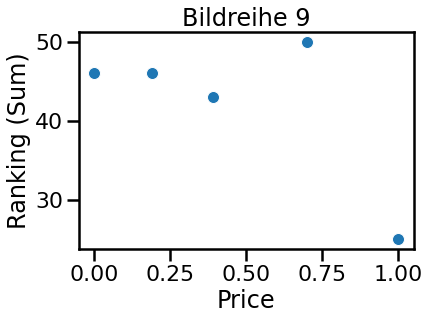

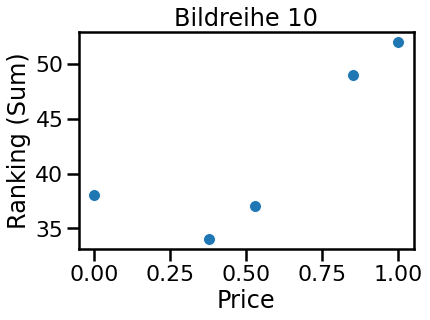

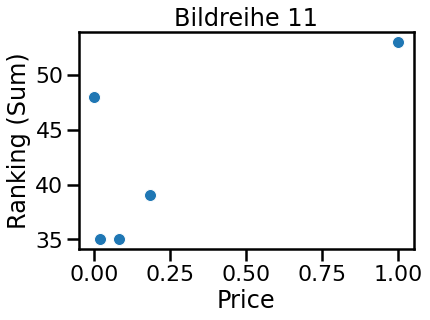

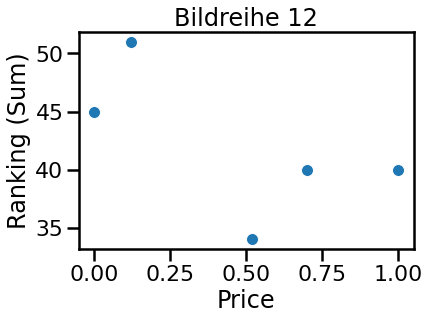

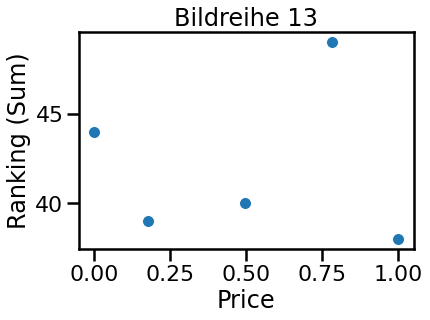

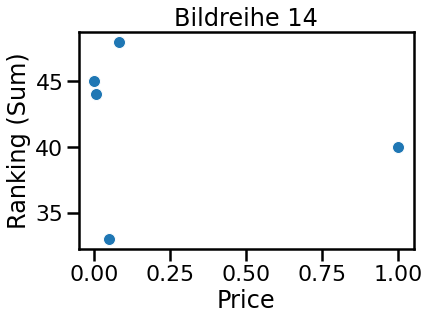

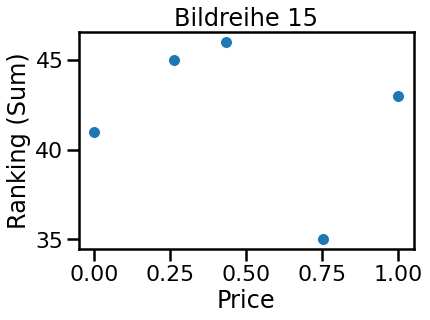

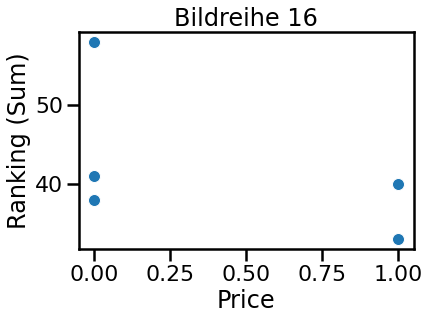

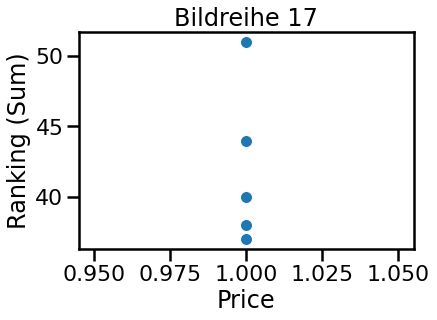

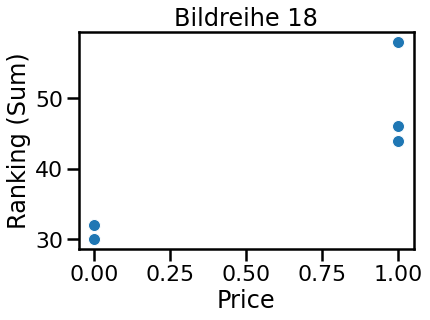

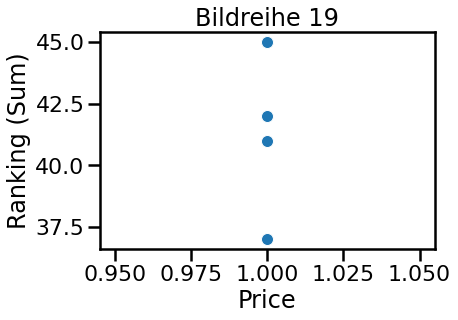

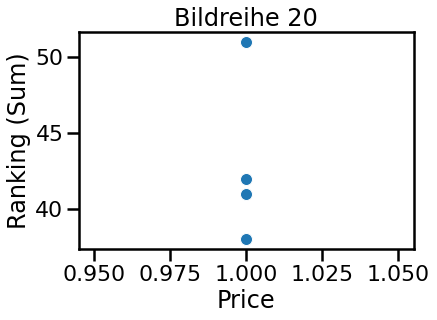

<Figure size 432x288 with 0 Axes>

In [59]:
ranking_sums_per_category = np.reshape(ranking_sums, (num_of_groups, num_images_per_group))
prices_per_category = np.reshape(prices, (num_of_groups, num_images_per_group))
prices_min_max_norm = []

for c in range(ranking_sums_per_category.shape[0]):
    xs = prices_per_category[c]
    ys = ranking_sums_per_category[c]
    # min-max normalization
    xs = min_max_norm(xs)
    prices_min_max_norm.extend(list(xs))


    g = sns.scatterplot(x=xs, y=ys)
    g.set(xlabel='Price', ylabel=f'Ranking (Sum)', title=f'Bildreihe {c+1}')
    plt.show()
    plt.clf()
    

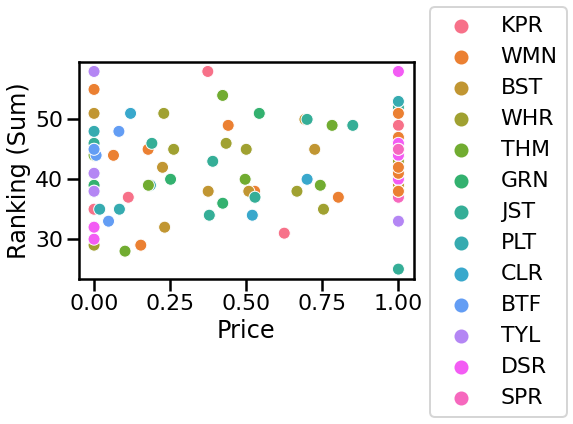

In [58]:
# min-max normalization
# prices_norm = min_max_norm(prices)

g = sns.scatterplot(x=prices_min_max_norm, y=ranking_sums, hue=gallery_names)
g.set(xlabel='Price', ylabel='Ranking (Sum)')
plt.legend(bbox_to_anchor=(1.05, 1.25), loc='upper left', borderaxespad=0)

No handles with labels found to put in legend.


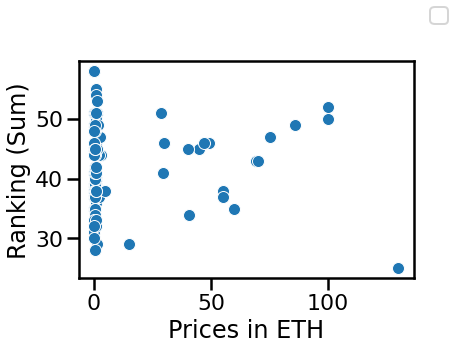

In [56]:
g = sns.scatterplot(x=prices, y=ranking_sums )
g.set(xlabel='Prices in ETH', ylabel='Ranking (Sum)')
plt.legend(bbox_to_anchor=(1.05, 1.25), loc='upper left', borderaxespad=0)